# Measurements

<hr>


This lecture's objectives:
- Know the basics of absorbance and optical density measurements.
- Know the basics of spectroscopy at the example of Raman spectroscopy.
- Being able to obtain concentrations from spectral data.

We are going to use a new library called [RamanSPy](https://ramanspy.readthedocs.io/en/latest/) that we will use to generate synthetic spectra. You can also check out their paper [(Georgiev, Pedersen, Xie, Fernández-Galiana, Stevens, and Barahona; Analytical Chemistry 2024)](https://pubs.acs.org/doi/full/10.1021/acs.analchem.4c00383).

In [261]:
# Uncomment the following line to install required packages

# %pip install requests ramanspy

Imports and logging

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import ramanspy as rp
import pint
import scipy

u = pint.UnitRegistry()

In [263]:
import logging

# Simple logger setup
logger = logging.getLogger("measurements")
logger.setLevel(logging.INFO)
logger.propagate = False

# Remove any existing handlers first
if logger.handlers:
    logger.handlers.clear()

# Add a StreamHandler
sh = logging.StreamHandler()
sh.setLevel(logging.INFO)
sh.setFormatter(logging.Formatter("[%(levelname)s] %(funcName)s: %(message)s"))
logger.addHandler(sh)

## Composition of a liquid culture

One often needs to determine the concentration of cells and medium components with a volume. Depending on the biological or chemical species of interest there is a variety of measurement techniques available.

We will discuss two representative methods:
- Absorbance and Optical density (OD)
- Spectroscopy; in particular Raman spectroscopy

Both these techniques rely on the sample being exposed to a light source, and collecting information about the light being modulated by the sample.

A third technique that follows the same principle, but requires different computational processing and analysis methods is microscopy - with an own upcoming lecture devoted to this topic.

## Absorbance

Let's start with the perhaps simplest method to determine the concentration of bacteria in a liquid culture.
In fact you will intuitively have used this method many times, perhaps in other contexts: simply look at it in a transparent container like a glass or flask.

This is not specific to bacteria and growth medium, but works with many suspensions (e.g., sand in water) or emulsions (e.g., milk in water): the higher the concentration of the dispersed substance, the more light is absorbed when shining light from one side and looking at it from the opposing side.

We can formulate the measurement setup as:
- A light beam (e.g., from an LED or laser) that is traversing a sample in a transparent cuvette.
- Measurement of light intensity received at the other side (e.g., by a photo diode) and comparison to the intensity received in presence of no sample.
- We expect the received light intensity to decrease with the concentration.

There are some limitations to this, though:
- When done in the lab for bacteria grown in, say LB medium, you may see by eye that the liquid becomes turbid, but this is not very precise. In more generality, it works better with something intransparent like sand than with something transparent like _E. coli_ bacteria.
- It becomes darker, but there is also a color change that gives us more information that the pure absorbance: sandy water becomes brown and milky water white. If you see a white solution you would expect it contains more milk than sand; and the other way for a brown solution.
- It does not work for all dissolved substances. For example, we do not observe this with solutions like salty water, unless we add a lot of salt.


## Optical Density

Let us assume the experimental setup of a cuvette of width $w > 0$ filled with a sample that comprises of
a transparent liquid and a suspended substance, say in concentration $c \geq 0$.
We will assume that the substance reduces or even blocks light through it, or alternatively, is transparent but refracts light.

We will shine light (more precisely, roughly parallel rays) with intensity $I(0)$ from one side onto the cuvette and collect light $I(w)$ on the opposing side.

We will next derive a central relation between $c$ and the collected light $I(d)$ which is known as the [Beer–Lambert law](https://en.wikipedia.org/wiki/Beer–Lambert_law):

> Over a wide range of mid-level concentrations $c$, it is
> $$
I(w)/I(0) = e^{-\gamma \cdot c \cdot w}
> $$
> for some $\gamma > 0$.

We will prove the statement under a slightly restricted assumption that allows for a simpler proof, but conveys the key proof idea.
In fact we will assume that $c$ is such that roughly the same concentration of the substance is found in each small slice of the liquid.
That excludes very low concentrations, say of bacteria, where some slices are expected to contain no bacteria.

In the following consider one such slice orthogonal to the light rays. We will identify the slice with its position $x$ that is between
$0$ and the width of the cuvette $w$.
We assume that slices have a marginal thickness $\Delta x > 0$ and, as previously noted, that the concentration is large enough and well mixed, so that all slices have the same concentration $c$ of the suspended substance.
A single slice is shown below.

![Blocking light with low concentration](figs/od_low_c.svg)

**Figure:** Incoming light (yellow rays) is blocked by the suspended material (in black) in the transparent liquid (in blue).

Now assume we increase the concentration by a factor. In case this factor is not too high, we expect the amount of light to be blocked to increase by the same factor (for very high factors, particles will be behind each other, saturating the blocking).
This is visualized as follows:

![Blocking light with higher concentration](figs/od.svg)

**Figure:** Incoming light is blocked by the suspended material with higher concentration.

We can phrase this as the the following relation between incoming and outgoing light intensities
$$
I(x + \Delta x) \approx I(x) - \gamma \cdot c \cdot I(x) \cdot \Delta x
$$
where $\gamma > 1$ is some proportionality constant that depends on the substance.

While (almost) transparent particles like _E. coli_ do not block light, the same relation holds as long as they disperse incoming light into a another direction. _E. coli_ are relatively complex bodies, so we can simply assume that they disperse light into a random direction, that is unlikely to be parallel to the incoming light.
The concept is shown in the next figure:

![Refraction of light by transparent material like E. coli](figs/od_ecoli.svg)

**Figure:** Incoming light is refracted by the suspended transparent material like _E. coli_ bacteria.

Letting the thickness of a slice $\Delta x \to 0$, we obtain
$$
dI(x) = - \gamma \cdot c \cdot I(x) \cdot dx
$$
or, in terms of a differential equation,
$$
\frac{dI(x)}{dx} = - \gamma \cdot c \cdot I(x) \enspace.
$$

Solving this ODE, see [the background chapter on ODEs](https://compbioeng.biodis.co/odes/notes.html), yields
$$
I(x) = I(0) \cdot e^{-\gamma \cdot c \cdot x}
$$
from the Beer–Lambert law.


### The case of a non-transparent liquid

Many liquids, like LB medium, are not fully transparent and will also reduce $I(x)$ even when $c=0$.
Model this by introducing a medium contribution with concentration $c'$ and coefficient $\gamma'$. Then for two contributors we get

$$
I(w) = I(0) \cdot e^{-(\gamma c + \gamma' c') w} \enspace.
$$

This is the simple form of the Beer–Lambert relation when scattering/absorption scales linearly with concentration (within the linear range of the instrument).

### Concentration Measurement via Optical Density

A [spectrophotometer](https://en.wikipedia.org/wiki/Spectrophotometry) works by the above principles, and typically measures
$I(w)$ for a certain path length $w$ at a certain wavelength $\lambda$.
Measured samples are from the mL range to droplets of 1-2 um in specialized devices. The former are often used for bacteria while the latter are used for purities of DNA concentrations.

The wavelength can often be selected on the device from a certain range.
Since the measured intensity depends on the wavelength, the measured optical density is annotated with the wavelength as $\text{OD}_\lambda$.
For example, for _E. coli_ often $\text{OD}_{600}$ is used denoting a wavelength of 600 nm.

Since the liquid without the substance ($c = 0$) will already show certain absorbance (in the above formula we can see this by considering the liquid as a mix of say water and sand with water having a certain $\gamma$ and sand another $\gamma'$) one typically first measures the pure liquid and then the liquid with the dissolved substance (a so called blank measurement).

Concretely, let us assume the following relation with $\gamma$ for the substance like _E. coli_ and $\gamma'$ for the liquid, e.g., LB growth medium.
$$
I(w) = I(0) \cdot e^{-(\gamma c  + \gamma' c') w}
$$

Many devices report absorbance (optical density) rather than raw intensity. For clarity we define the natural-log absorbance
$$
A_{e}(w) = -\ln\left(\frac{I(w)}{I(0)}\right) \enspace.
$$

Using the exponential model from above (with both analyte and medium),
$$
I(w) = I(0) \cdot e^{-(\gamma c + \gamma' c') w} \enspace,
$$

we obtain
$$
A_{e}(w) = (\gamma c + \gamma' c') w \enspace.
$$

Thus a blank measurement (medium only, $c=0$) gives $A_{e}^{\mathrm{blk}} = \gamma' c' w$, and for a sample $A_{\mathrm{ln}}^{\mathrm{m}} = (\gamma c + \gamma' c') w$. Subtracting the blank removes the medium contribution:

$$
A_{e}^{\mathrm{m}} - A_{e}^{\mathrm{blk}} = \gamma c w \enspace.
$$

While we used $A_{e}$ for simplicity above, devices typically report the optical density as $A_{10}$, i.e., using $\log_{10}$.
The following relation holds: $A_{10} = A_{e} / \ln(10)$.

> **_Side note:_** We have assumed that the measurement device is aware of $I(0)$ when computing $A_{e}$.
> In fact, we could also drop this assumption and define
> $$
L_{e}(w) = -\ln\left( I(w) \right)\enspace.
> $$
> One verifies that, we still obtain
> $$
L_{e}^{\mathrm{m}} - L_{e}^{\mathrm{blk}} = \gamma c w \enspace.
> $$


The formula also hints at a potential problem in comparing OD values.
We observe that the OD value is proportional to $w$.
Changing the device or the cuvette with a different $w$ will thus result in different measurements.
Also the $\log(I(0))$ will be different between devices and must be considered for non-blanked values.

Some measurement setups use the dependence on $w$ by measuring high concentrations.
FOr example, assume that your device with a normal cuvette of $w = 1$\,cm would report an $\text{OD}_{600}$
above $4$ which is not supported by the device.
By changing to a cuvette that has a thickness of $w = 0.1$\,cm we are expecting an OD divided by 10,
which may very well be in the range of the measurement device and does not require to dilute the sample down before measuring it.

Some devices can measure a full spectrum, that is, report OD for a large range of wavelength with a single measurement.

We will next discuss a measurement method that also relies on spectra and we would like to remark that one can apply similar methods to those discussed next to the absorbance spectra.



## Raman spectroscopy

The following figure shows a representative Raman spectroscopy setup.

![Raman spectroscopy setup schematic](https://upload.wikimedia.org/wikipedia/commons/d/db/Setup_Raman_Spectroscopy_adapted_from_Thomas_Schmid_and_Petra_Dariz_in_Heritage_2%282%29_%282019%29_1662-1683.png)

**Figure:** Schematic of a Raman spectroscopy setup. Adapted from Thomas Schmid and Petra Dariz (2019). "Raman Microspectroscopic Imaging of Binder Remnants in Historical Mortars Reveals Processing Conditions". *Heritage* 2(2): 1662–1683. Image by Toommm, [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/), via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Setup_Raman_Spectroscopy_adapted_from_Thomas_Schmid_and_Petra_Dariz_in_Heritage_2(2)_(2019)_1662-1683.png).

In the setup, photons from the laser beam are projected onto a sample.
Two types of photons are observed after hitting the sample.
1. Most photons are elastically scattered by the material without (or with almost no, as in an elastic collision with a huge mass) energy change. Only the direction changes due to the collision.
2. Some photons, however, are observed to have a different energy level and thus a different frequency. This is due to vibrational changes within the material, resp., its chemical bonds, induced by the collision.

The second type of photons are those that contain the information we are interested in. They are collected and their counts and wavenumber ($\text{cm}^{-1}$) are reported. In fact the difference in the wavenumber of the received photon and the emitted photon is reported; resulting in a Raman spectrum. This difference is called the Raman shift ($\text{cm}^{-1}$).

### Wavenumber notation

In Raman spectroscopy, one commonly uses wavenumber rather than wavelength or frequency to characterize photons. This choice is not arbitrary - wavenumber offers practical advantages for spectroscopic measurements.

The wavenumber $\tilde\nu$ [$\text{m}^{-1}$] is related to the wavelength $\lambda$ [$\text{m}$] via

$$\tilde\nu = \frac{1}{\lambda}$$

From the relation between frequency $\nu$ [$\text{s}^{-1}$] and the speed of a photon $c$ [$ms^{-1}$], we have

$$\tilde\nu = \frac{\nu}{c}$$

The wavenumber is convenient because it is directly proportional to both the frequency and the energy of a photon via the [Planck relation](https://en.wikipedia.org/wiki/Planck_relation):

$$E = h\nu = hc\tilde\nu$$

This direct proportionality means that when we look at a Raman spectrum plotted against wavenumber, peaks at higher wavenumbers correspond to higher energy vibrational transitions in the molecular bonds. Additionally, wavenumber differences (Raman shifts) directly correspond to the energy differences of molecular vibrations, making it easier to identify and compare chemical signatures.

### A first synthetic spectrum

We will use the Python library [RamanSPy](https://ramanspy.readthedocs.io/en/latest/#) to generate a first synthetic spectrum. It shows peaks of intensity at certain wavelengths, that partially overlap creating this characteristic spectrum. The generated spectrum does not have a background signal. We will discuss this later in the lecture, but neglect it for the moment, assuming that it has already been removed.

> **_Side note:_** While we will discuss Raman spectra, much of what follows is not specific to Raman spectroscopy and holds as well for other spectra.

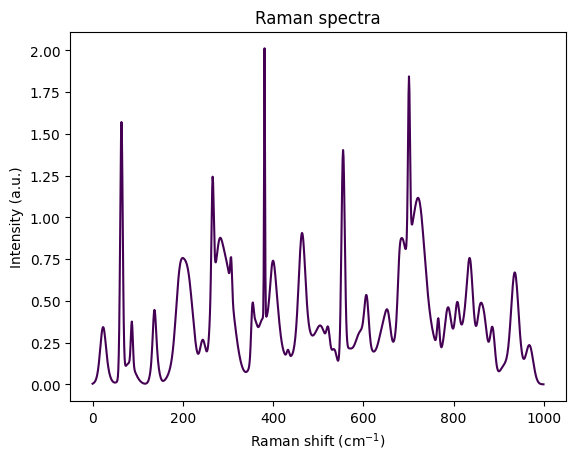

In [264]:
# Generate synthetic spectrum
spectra = rp.synth.generate_spectra(num_spectra=1, n_bands=1000, realistic=True, seed=10)

# And show it
rp.plot.spectra(spectra[0])
rp.plot.show()

Visually, the spectrum looks like an overlay of several peaks. Each peak roughly has the form of a bell curve, resp., a [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function).
The Gaussian shape sounds reasonable, since we expect the sample to scatter at certain wavenumbers - and as usual for measurements, this scatter will be noisy and thus peaks rather bell shaped than [Dirac functions](https://en.wikipedia.org/wiki/Dirac_delta_function).

Following this intuition, we start with a simplified notion of a spectrum as a sum of Gaussian functions, each of which corresponds to an idealized peak of amplitude $a$.
Letting $x$ be the Raman shift, a Gaussian peak is a spectrum of the form

$$
f(x) = a \cdot e^{-\frac{(x-\mu)^2}{2 w^2}}
$$

and we refer to $a$ as the amplitude, $\mu$ the mean, and $w$ the width.
Let's code a function that creates a peak. For simplicity we will assume here that our spectra all are between 0 and 1000 $\text{cm}^{-1}$ and comprise of 1000 bins, i.e., the numerical resolution is $1 \text{cm}^{-1}$.

In [265]:
def peak(pos: float, width: float) -> np.ndarray:
    # For simplicity we set spectral range and sample number
    # to constants.
    x = np.linspace(0,1000, 1000)

    # Gauss function, with amplitude 1.
    return 1 * np.exp( -(x - pos)**2 / (2*width**2) )

We can now create a simplified first spectrum comprising peaks at 500 and 750 of amplitude 1 and widths 10 and amplitude 1/5 and width 30.

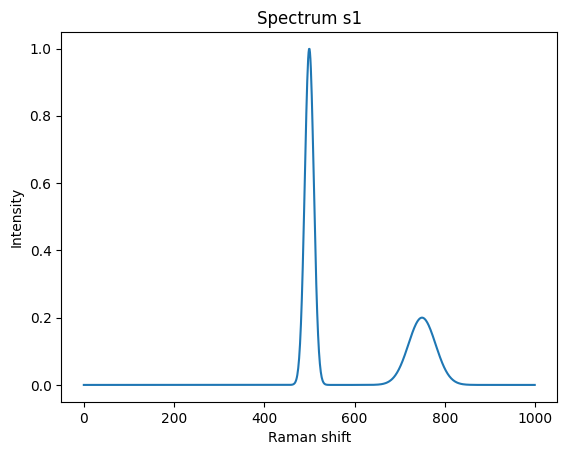

In [266]:
# Simple spectrum
s1 = peak(500,10) + 1/5*peak(750,30)

plt.figure()
plt.plot(s1)
plt.title("Spectrum s1")
plt.xlabel("Raman shift")
plt.ylabel("Intensity");

Let's create a second spectrum.

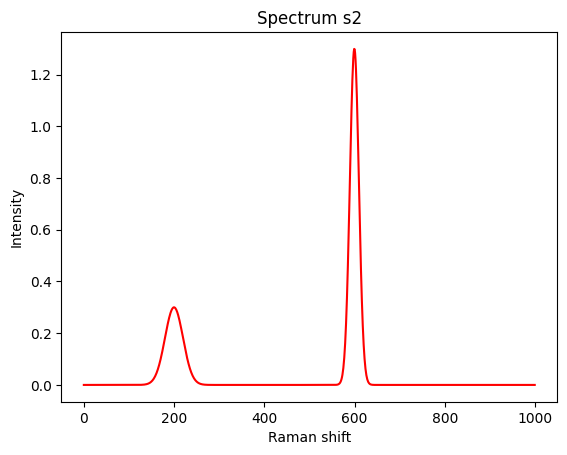

In [267]:
# Another simple spectrum
s2 = 0.3*peak(200,20) + 1.3*peak(600,10)

plt.figure()
plt.plot(s2, 'r')
plt.title("Spectrum s2")
plt.xlabel("Raman shift")
plt.ylabel("Intensity");

It is time to overlay both into a single spectrum. We assume the (bio-)chemical species responsible for spectrum $s_1$ is available in concentration $c_1 = 0.2$ and the species for $s_2$ in $c_2 = 0.5$.

While a priori this is a strong assumption, we assume that spectra are composed linearly, proportional to the concentrations of their components.

We can thus code a mixing function for spectra of components as:

In [268]:
def mix(spec: list[np.ndarray], coefficients: list[float]) -> np.ndarray:
    """Mix spectra with given coefficients."""

    if len(spec) == 0:
        raise ValueError("Expecting at least 1 spectrum")
    if len(spec) != len(coefficients):
        raise ValueError("Number of spectra and coefficients must match")

    ret = np.zeros_like(spec[0])
    for i, s in enumerate(spec):
        ret += coefficients[i] * s
    return ret

Resulting in the following spectrum (in black). The two original spectra are shown in blue and red.

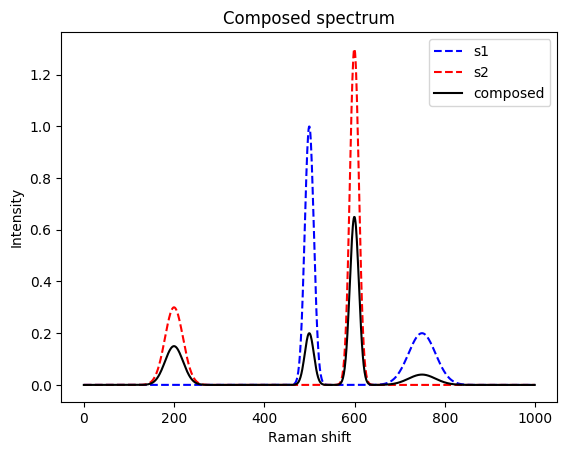

In [269]:
mixed = mix([s1, s2], [0.2, 0.5])

plt.figure()
plt.plot(s1, 'b--', label='s1')
plt.plot(s2, 'r--', label='s2')
plt.plot(mixed, 'k', label='composed')
plt.title("Composed spectrum")
plt.xlabel("Raman shift")
plt.ylabel("Intensity")
plt.legend();

When analyzing a sample, the game is reversed. It is nature that mixes and we need to find back the original coefficients.

Concretely, the problem we would like to solve is finding the two coefficients $c_1$ and $c_2$ back from the mixed spectrum, assuming that we know it is a mix of $s_1$ and $s_2$.
Using matrix notation, we can phrase the problem as solving the least square problem

$$
\min_c \|Sc - m\|_2
$$

where

$$
S = \begin{bmatrix}
{\vec s_{1}} & \vec s_{2} \\
\end{bmatrix}
$$


$$
c = \begin{bmatrix}
c_{1}\\
c_{n}
\end{bmatrix}
$$

and $m$ is the mixed spectrum. 

In [270]:
def demix(components: list[np.ndarray], mixed: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    S = np.vstack(components).T
    c, residuals, _, _ = np.linalg.lstsq(a=S, b=mixed, rcond=None)
    return c, residuals

c, residuals = demix(components=[s1, s2], mixed=mixed)
print(f"The coefficients are {c}.\nThe sums of squared residuals are {residuals}.")

The coefficients are [0.2 0.5].
The sums of squared residuals are [9.20547852e-31].


So, indeed, we successfully found back the two concentrations.

## More involved spectra

The above example was well behaved with respect to several properties:
1. All peaks are well separated and do not overlap. Neither between spectra, nor within a spectrum.
2. We knew exactly which species are present.
3. A perfectly clean spectrum was assumed: no background signal and no measurement were present.

We start by elevating (1) and (2). The next mixed spectrum has more involved spectra with overlapping peaks between and within a spectrum. Further, we are not sure if two other candidate species are present. 

The coefficients are [ 2.00000000e-01  5.00000000e-01  9.15446698e-18 -9.07151373e-17].
The sums of squared residuals is [2.32410096e-30].


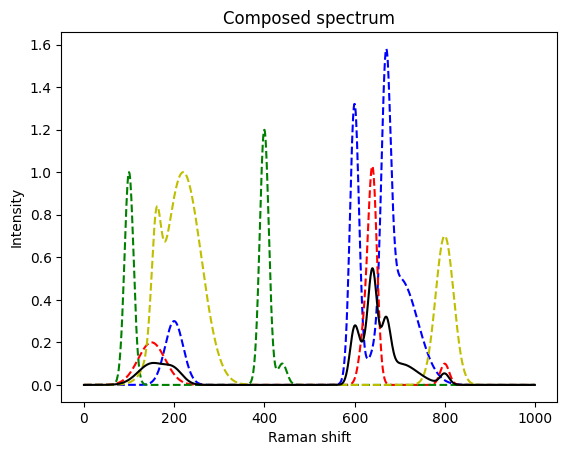

In [271]:
s3 = 0.3*peak(200,20) + 1.3*peak(600,10) + 1.2*peak(670,10) + 0.5*peak(700,40)
s4 = 0.2*peak(150,30) + 0.2*peak(620,10) + 1.0*peak(640,10) + 0.1*peak(800,10)
s5 = 1.0*peak(100,10) + 1.2*peak(400,10) + 0.1*peak(440,10)
s6 = 0.5*peak(160,10) + 1.0*peak(220,40) + 0.7*peak(800,20)
mixed = mix([s3, s4, s5, s6], [0.2, 0.5, 0.0, 0.0])

plt.figure()
plt.plot(s3, 'b--')
plt.plot(s4, 'r--')
plt.plot(s5, 'g--')
plt.plot(s6, 'y--')
plt.plot(mixed, 'k')
plt.title("Composed spectrum")
plt.xlabel("Raman shift")
plt.ylabel("Intensity")

c, residuals = demix(components=[s3, s4, s5, s6], mixed=mixed)
print(f"The coefficients are {c}.\nThe sums of squared residuals is {residuals}.")

Again, we found back the initial concentrations.

Let's make it even more difficult and add noise. Measurement noise is often composed of an additive and a multiplicative component. Here, we assume a multiplicative component, first. We will latter also include an additive component - the background signal.

In [272]:
def make_noisy(spec: list[np.ndarray], factor=0.1) -> list[np.ndarray]:
    ret = []
    for s in spec:
        gaussian_multiplicative_noise = np.random.normal(loc=1.0, scale=factor, size=s.shape)
        ret.append(s * gaussian_multiplicative_noise)
    return ret

The coefficients are [ 2.03043721e-01  4.78771439e-01  5.85396227e-05 -1.27394654e-04].
The sums of squared residuals is [0.20819475].


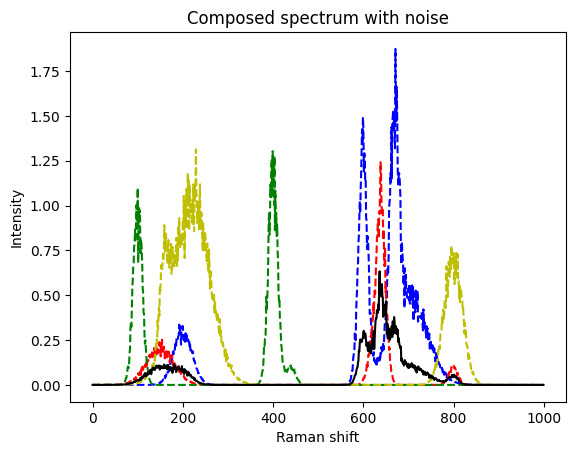

In [273]:
s3 = 0.3*peak(200,20) + 1.3*peak(600,10) + 1.2*peak(670,10) + 0.5*peak(700,40)
s4 = 0.2*peak(150,30) + 0.2*peak(620,10) + 1.0*peak(640,10) + 0.1*peak(800,10)
s5 = 1.0*peak(100,10) + 1.2*peak(400,10) + 0.1*peak(440,10)
s6 = 0.5*peak(160,10) + 1.0*peak(220,40) + 0.7*peak(800,20)

# make noisy
s3_noisy, s4_noisy, s5_noisy, s6_noisy = make_noisy([s3, s4, s5, s6])

# use the real / not noisy compounds to create the spectrum
mixed = mix([s3, s4, s5, s6], [0.2, 0.5, 0.0, 0.0])
# and make it noisy
mixed_noisy = make_noisy([mixed])[0]

plt.figure()
plt.plot(s3_noisy, 'b--')
plt.plot(s4_noisy, 'r--')
plt.plot(s5_noisy, 'g--')
plt.plot(s6_noisy, 'y--')
plt.plot(mixed_noisy, 'k')
plt.title("Composed spectrum with noise")
plt.xlabel("Raman shift")
plt.ylabel("Intensity")

c, residuals = demix(components=[s3_noisy, s4_noisy, s5_noisy, s6_noisy], mixed=mixed_noisy)
print(f"The coefficients are {c}.\nThe sums of squared residuals is {residuals}.")

This is still a very good match to the real coefficients. The method seems to be quite robust.

After this warmup rounds, we are ready to proceed to real spectra. We do not only expect many more peaks in such spectra, in particular if they come from complex samples like bacteria, but will also have to treat the previously mentioned background signal.

## Bacterial spectra

Following the tutorial on [RamanSPy](https://ramanspy.readthedocs.io/en/latest/datasets.html#bacteria-data) we next download a dataset of bacterial spectra obtained by [Ho et al. (Nat Commun, 2019)](https://www.nature.com/articles/s41467-019-12898-9).
Like in the [RamanSPy - loading bacterial data](https://ramanspy.readthedocs.io/en/latest/auto_tutorials/iii-datasets/plot_i_bacteria.html#sphx-glr-auto-tutorials-iii-datasets-plot-i-bacteria-py) tutorial, we load and show the data afterwards.

[INFO] <module>: Dataset already exists at tmp_data/bacteria_dataset.zip, skipping download.


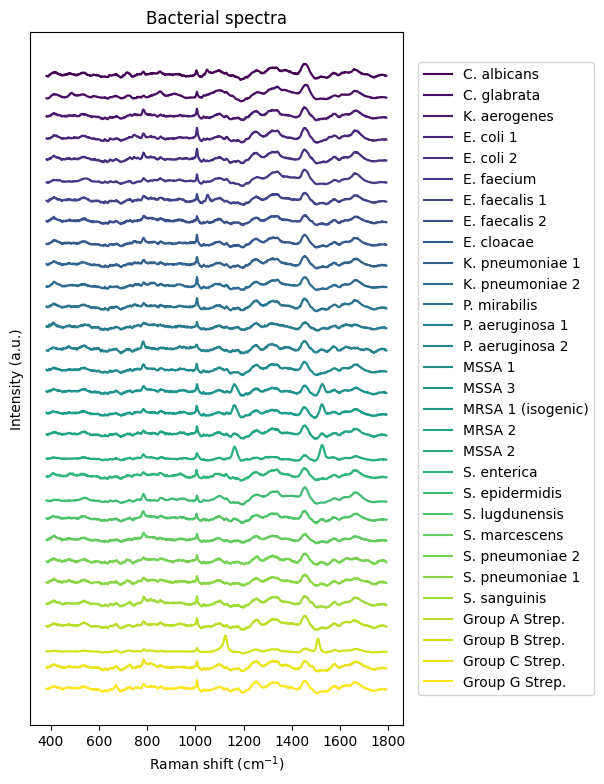

In [274]:
import requests
from pathlib import Path
import zipfile

# Change this to the downloaded data dir
data_dir = Path("tmp_data")
data_dir.mkdir(exist_ok=True)

# Download bacterial spectra following the RamanSPy tutorial
dropbox_url = "https://www.dropbox.com/scl/fo/fb29ihfnvishuxlnpgvhg/AJToUtts-vjYdwZGeqK4k-Y?rlkey=r4p070nsuei6qj3pjp13nwf6l&e=1&dl=1"
output_path = data_dir / "bacteria_dataset.zip"

if not output_path.exists():
    response = requests.get(dropbox_url)
    with open(output_path, "wb") as f:
        f.write(response.content)
    logger.info(f"Downloaded dataset to {output_path}")
else:
    logger.info(f"Dataset already exists at {output_path}, skipping download.")

# Unzip the file
with zipfile.ZipFile(output_path, "r") as zip_ref:
    zip_ref.extractall(data_dir)

# Get the training data
X_train, y_train = rp.datasets.bacteria("val", folder=data_dir)
y_labels, _ = rp.datasets.bacteria("labels")

# Normalize spectra
spectra = [[X_train[y_train == species_id]] for species_id in list(np.unique(y_train))]
spectra_norm = rp.preprocessing.normalise.MinMax().apply(spectra)

# Plot all spectra
plt.figure(figsize=(6.5, 9))
rp.plot.mean_spectra(
    spectra_norm,
    label=y_labels,
    plot_type="single stacked",
    title="Bacterial spectra"
);


There is one with _E. coli_ that particularly interests us.

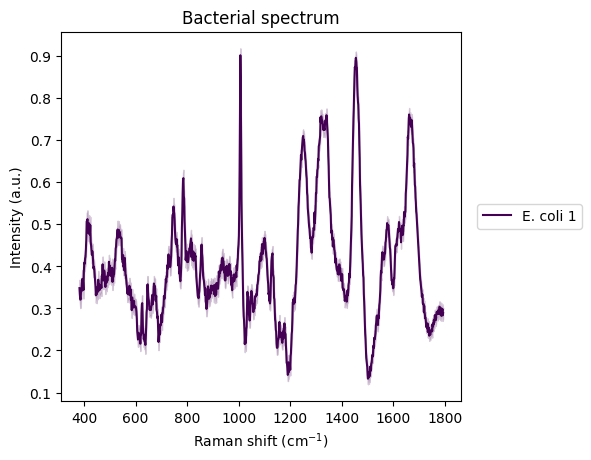

In [275]:
plt.figure()
idx_ecoli = 3
rp.plot.mean_spectra(
    spectra_norm[idx_ecoli],
    label=y_labels[idx_ecoli],
    plot_type="single stacked",
    title="Bacterial spectrum"
);

Text(0.5, 1.0, 'Mixed bacterial spectrum')

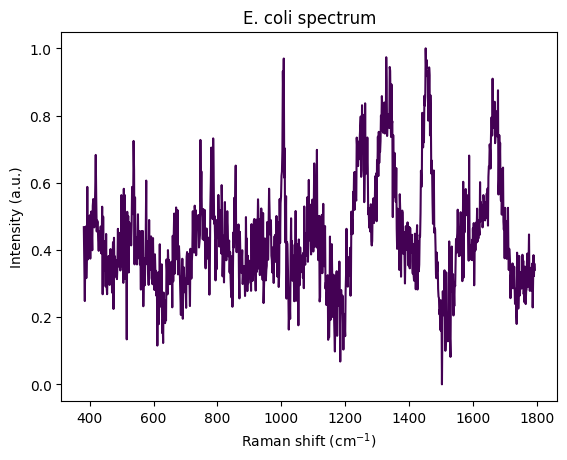

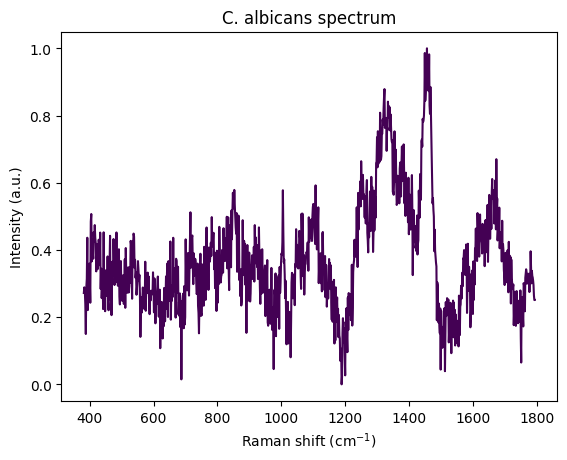

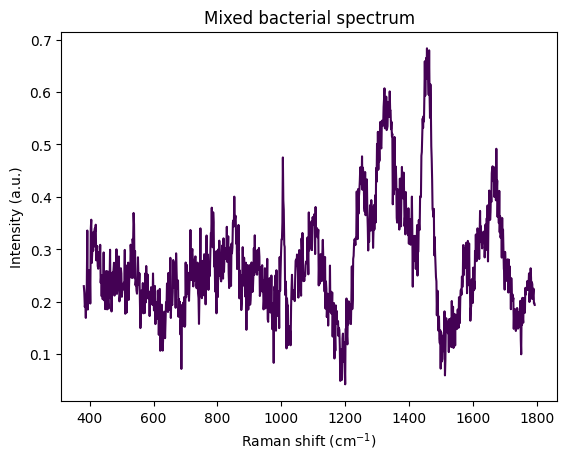

In [276]:
# the two components
plt.figure()
ecoli_spectrum = spectra[idx_ecoli][0][0]
rp.plot.spectra(ecoli_spectrum)
plt.title("E. coli spectrum")

plt.figure()
calbicans_spectrum = spectra[0][0][0]
rp.plot.spectra(calbicans_spectrum)
plt.title("C. albicans spectrum")

# creating a mixed one
to_mix = [ecoli_spectrum, calbicans_spectrum]
cs = np.array([0.2, 0.5])
mixed_bac = rp.synth.mix(to_mix, cs, mixture_mode='linear', noise=False, baseline=False, seed=42)

plt.figure()
rp.plot.spectra(mixed_bac)
plt.title("Mixed bacterial spectrum")

In [277]:
c, redidual = demix(components=[ecoli_spectrum.spectral_data, calbicans_spectrum.spectral_data], mixed=mixed_bac.spectral_data)
print(f"The coefficients are {c} and the sums of squared residuals is {residuals}.")

The coefficients are [0.2 0.5] and the sums of squared residuals is [0.20819475].


## Removing noise and a background signal

- May exist, e.g., because of a fluorescent background.
- Assume the spectrum of the background is not known and can not be simply subtracted.
- Estimate the baseline and subtract it. Also called baseline correction.

Let's create a synthetic spectrum with a simple background and noise.

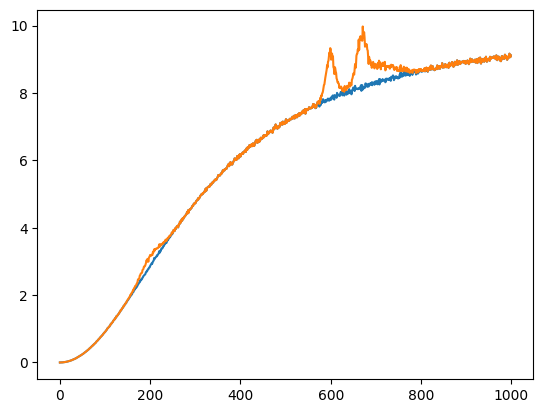

In [278]:
x = np.linspace(0,100, 1000)

# make a noisy background
background_signal = make_noisy(
    [x**2 / (1 + x**2/1000) * 1/100],
    factor=0.005
)
plt.plot(background_signal[0])

# and add it to our signal
s3_noisy_bck = background_signal[0] + s3_noisy
plt.plot(s3_noisy_bck);

Same for the other signals.

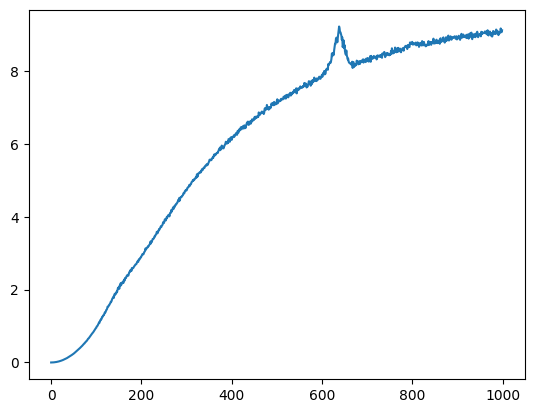

In [279]:
s4_noisy_bck = background_signal[0] + s4_noisy
plt.plot(s4_noisy_bck);

### Removing noise: Savitzky–Golay filter

Given a signal, one can locally, i.e., within a symmetric window of a fixed size around the point to be approximated, fit a least-square error polynomial. The simplest such filter is a non-causal moving average. The filter is a least-squares solution to fitting a polynomial of degree 0.

Further literature
- Reading and discussing [Savitzky–Golay filters](https://en.wikipedia.org/wiki/Savitzky–Golay_filter) as a way to locally fit a polynomial to the signal, or equivalently, perform a convolution with a non-causal filter signal.
- The paper [Savitzky and Golay (1964)](https://pubs.acs.org/doi/abs/10.1021/ac60214a047).

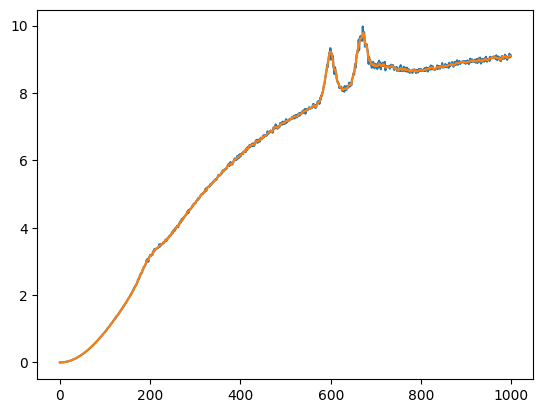

In [280]:
s3_denoise_est = scipy.signal.savgol_filter(x=s3_noisy_bck, window_length=9, polyorder=3)

plt.figure()
plt.plot(s3_noisy_bck)
plt.plot(s3_denoise_est);

### Removing the background

Text(0.5, 1.0, 'Estimated signal and signal')

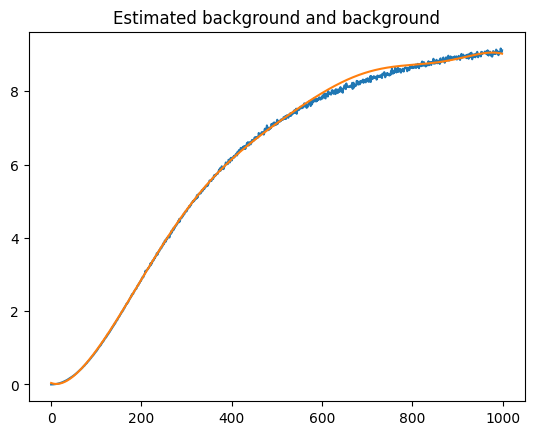

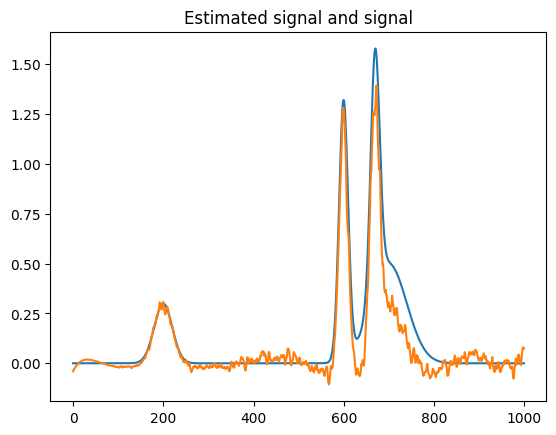

In [281]:
# setup the preprocessing pipeline
pipe = rp.preprocessing.protocols.Pipeline([
    # rp.preprocessing.denoise.SavGol(window_length=9, polyorder=3),
    rp.preprocessing.baseline.IModPoly(poly_order=10),
])

# apply pipeline
s3_est = pipe.apply(rp.Spectrum(s3_denoise_est, x))

# background estimate
bkg_est = s3_denoise_est - s3_est.spectral_data

# plot the results
# _ = rp.plot.spectra(s3_est, plot_type='separate')

plt.figure()
plt.plot(background_signal[0])
plt.plot(bkg_est)
plt.title("Estimated background and background")

plt.figure()
plt.plot(s3)
plt.plot(s3_est.spectral_data)
plt.title("Estimated signal and signal")

More information on background removal in signals can be found at the page of the Python package [pybaselines](https://pybaselines.readthedocs.io/en/latest/index.html). For example, you can checkout this [example](https://pybaselines.readthedocs.io/en/latest/examples/general/plot_noisy_data.html#sphx-glr-examples-general-plot-noisy-data-py) as a start.

---
### Further literature

- Measuring bacteria in a microplate-reader: [Stevenson, McVey, Clark, Swain, Pilizota (Sci Rep, 2016)](https://www.nature.com/articles/srep38828)
- Measuring DNA concentration and quality via spectrophotometry: [Waldron (addgene blog, 2025)](https://blog.addgene.org/whats-in-your-tube-a-quick-guide-to-measuring-dna-by-spectrophotometry)

---
**License**: © 2025 Matthias Függer and Thomas Nowak. Licensed under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).